In [1]:
import pandas as pd
import numpy as np

# do a preliminary read of the csv and attempt to parse column types
dev_2017_pre = pd.read_csv('consumption_deviation_FR_new.csv', sep=';', decimal=',', parse_dates=['timestamp'])

print(dev_2017_pre)

# since the quantity column is parsed generically as object, 
# it likely includes some anomalous (e.g. missing) values 
print(dev_2017_pre.dtypes)

                timestamp      quantity
0     2017-01-01 00:00:00       -44,875
1     2017-01-01 00:30:00       -18,125
2     2017-01-01 01:00:00       -10,375
3     2017-01-01 01:30:00         7,125
4     2017-01-01 02:00:00       -43,375
...                   ...           ...
17535 2017-12-31 22:45:00  -21,48982889
17536 2017-12-31 23:00:00  -7,807809406
17537 2017-12-31 23:15:00  -56,69726053
17538 2017-12-31 23:30:00   21,83256871
17539 2017-12-31 23:45:00   4,452218702

[17540 rows x 2 columns]
timestamp    datetime64[ns]
quantity             object
dtype: object


In [2]:
# rows indices 13594, 13595, 13596 are missing values for deviation
print(dev_2017_pre[dev_2017_pre['quantity']=='na'])


                timestamp quantity
13594 2017-11-10 16:00:00       na
13595 2017-11-10 16:30:00       na
13596 2017-11-10 17:00:00       na


In [3]:
# since only few rows contain missing quantity values, 
# we just load the csv again skipping them
# use 
dev_2017 = pd.read_csv('consumption_deviation_FR_new.csv', sep=';', decimal=',', parse_dates=['timestamp'], skiprows=range(13595,13598))

# check that rows with missing quantity values have been removed
# print(dev_2017[dev_2017['quantity']=='na'])

# another ignored option: filter the loaded dataframe directly.
# however, here we would need to replace commas
# by periods as decimal separators in order to be
# able to parse them as floats

# dev_2017 = dev_2017_pre.loc[dev_2017_pre['quantity']!='na']

In [4]:
# the column types are now correctly parsed
dev_2017.dtypes

timestamp    datetime64[ns]
quantity            float64
dtype: object

In [5]:
# there seem to be some extreme outliers
dev_2017.describe()

,quantity
count,1.753700e+04
mean,-7.852510e+03
std,7.435333e+05
min,-7.898546e+07
25%,-3.087500e+01
50%,2.875000e+00
75%,3.875000e+01
max,5.651250e+02


In [6]:
# look for the timestamps corresponding to these extremes
dev_2017.set_index('timestamp', inplace=True, drop=True)
dev_2017.loc[dev_2017.idxmin()]

,quantity
timestamp,
2017-11-05 04:30:00,-78985465.0


In [7]:
# the maximum value is not as absurd as the minimum, so no
# need to drop it

dev_2017.loc[dev_2017.idxmax()]

,quantity
timestamp,
2017-07-12 04:30:00,565.125


In [8]:
# the entry corresponding to the minimum value is suspicious
# as there don't exist news of massive energy consumption 
# in france on that date. let's drop it from the dataframe

# i should drop outliers more systematically, like with a 
# lambda function
dev_2017.drop(dev_2017.idxmin(), inplace=True)


In [9]:
# the new minimum is also suspicious, let's drop it as well
dev_2017.loc[dev_2017.idxmin()]

,quantity
timestamp,
2017-11-05 04:00:00,-58796353.0


In [10]:
dev_2017.drop(dev_2017.idxmin(), inplace=True)

In [11]:
# the resulting minimum seems more realistic, so we'll keep it

dev_2017.loc[dev_2017.idxmin()]

,quantity
timestamp,
2017-01-25 13:00:00,-340.75


<AxesSubplot:xlabel='timestamp'>

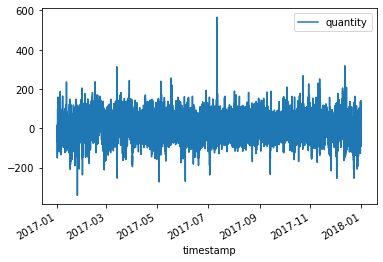

In [12]:
# now let's have a look at the time series. it would be
# unintelligible if we hadn't removed the outliers
dev_2017.plot()

In [13]:
# since we are interested in the relation between average 
# consumption and average temperature on a half-hourly basis,
# aggregate the consumption data. this will only affect the 
# rows for the last day of the year, which have a quarter-hourly 
# granularity as opposed to the half-hourly of the remaining
# rows, and will re-introduce the rows we excluded earlier
# for being outliers, now with value NaN, so we should look out
dev_2017_half = dev_2017.resample('30T').mean()
dev_2017_half.tail(10)

,quantity
timestamp,
2017-12-31 19:00:00,16.647287
2017-12-31 19:30:00,-9.012571
2017-12-31 20:00:00,33.898761
2017-12-31 20:30:00,-4.562091
2017-12-31 21:00:00,-20.452765
2017-12-31 21:30:00,-34.302923
2017-12-31 22:00:00,67.119462
2017-12-31 22:30:00,7.185383
2017-12-31 23:00:00,-32.252535


In [14]:
dev_2017_half.loc['2017-11-05']

,quantity
timestamp,
2017-11-05 00:00:00,-27.875
2017-11-05 00:30:00,24.250
2017-11-05 01:00:00,-23.250
2017-11-05 01:30:00,25.250
2017-11-05 02:00:00,2.375
2017-11-05 02:30:00,2.625
2017-11-05 03:00:00,-10.375
2017-11-05 03:30:00,-28.250
2017-11-05 04:00:00,NaN


<AxesSubplot:xlabel='timestamp'>

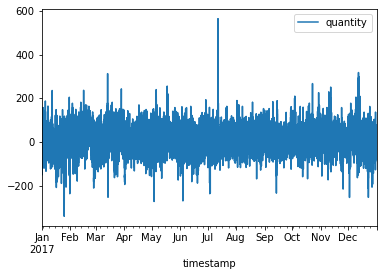

In [15]:
dev_2017_half.plot()

In [16]:
dev_2017_half.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:30:00',
               '2017-01-01 01:00:00', '2017-01-01 01:30:00',
               '2017-01-01 02:00:00', '2017-01-01 02:30:00',
               '2017-01-01 03:00:00', '2017-01-01 03:30:00',
               '2017-01-01 04:00:00', '2017-01-01 04:30:00',
               ...
               '2017-12-31 19:00:00', '2017-12-31 19:30:00',
               '2017-12-31 20:00:00', '2017-12-31 20:30:00',
               '2017-12-31 21:00:00', '2017-12-31 21:30:00',
               '2017-12-31 22:00:00', '2017-12-31 22:30:00',
               '2017-12-31 23:00:00', '2017-12-31 23:30:00'],
              dtype='datetime64[ns]', name='timestamp', length=17520, freq='30T')

In [17]:
# let us now data corresponding to temperatures
# first i will restrict to data from a station 
# close to paris, named LFPB

paris_temp_2017_pre = pd.read_csv('LFPB.txt', skiprows=5, parse_dates=True, usecols=['valid', 'tmpc'], index_col='valid')

In [18]:
paris_temp_2017_pre.head(10)

,tmpc
valid,
2017-01-01 00:00:00,-3.0
2017-01-01 00:30:00,-3.0
2017-01-01 01:00:00,-3.0
2017-01-01 01:30:00,-3.0
2017-01-01 02:00:00,-3.0
2017-01-01 02:30:00,-3.0
2017-01-01 03:00:00,-3.0
2017-01-01 03:30:00,-3.0
2017-01-01 04:00:00,-4.0


In [19]:
paris_temp_2017_pre.dtypes

tmpc    float64
dtype: object

In [20]:
paris_temp_2017_pre.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:30:00',
               '2017-01-01 01:00:00', '2017-01-01 01:30:00',
               '2017-01-01 02:00:00', '2017-01-01 02:30:00',
               '2017-01-01 03:00:00', '2017-01-01 03:30:00',
               '2017-01-01 04:00:00', '2017-01-01 06:00:00',
               ...
               '2017-12-30 19:00:00', '2017-12-30 19:30:00',
               '2017-12-30 20:00:00', '2017-12-30 20:30:00',
               '2017-12-30 21:00:00', '2017-12-30 21:30:00',
               '2017-12-30 22:00:00', '2017-12-30 22:30:00',
               '2017-12-30 23:00:00', '2017-12-30 23:30:00'],
              dtype='datetime64[ns]', name='valid', length=17167, freq=None)

In [21]:
# since we are interested in consumption data on a half-hourly
# basis, we need to make sure this is the granularity of the
# temperature data as well. for this, we can fill missing values
# values via forward fill, as we don't expect much temperature
# variation on short time intervals

paris_temp_2017 = paris_temp_2017_pre.resample('30T').ffill()



In [22]:
paris_temp_2017

,tmpc
valid,
2017-01-01 00:00:00,-3.0
2017-01-01 00:30:00,-3.0
2017-01-01 01:00:00,-3.0
2017-01-01 01:30:00,-3.0
2017-01-01 02:00:00,-3.0
...,...
2017-12-30 21:30:00,14.0
2017-12-30 22:00:00,14.0
2017-12-30 22:30:00,14.0


In [23]:
# let's do the same with the historical temperature data from
# the same weather station near paris, which comprises measurements
# from 2010 to 2016

paris_temp_hist_pre = pd.read_csv('LFPB_historical.txt', skiprows=5, parse_dates=True, usecols=['valid', 'tmpc'], index_col='valid')

In [24]:
paris_temp_hist_pre.head(10)

,tmpc
valid,
2010-01-01 00:00:00,1.0
2010-01-01 00:30:00,1.0
2010-01-01 01:00:00,1.0
2010-01-01 01:30:00,1.0
2010-01-01 02:00:00,1.0
2010-01-01 02:30:00,1.0
2010-01-01 03:00:00,1.0
2010-01-01 03:30:00,0.0
2010-01-01 04:00:00,0.0


In [25]:
# uniformize the granularity of this dataset
# here asfreq or resample don't work because it says there are 
# nonunique index values

# this is because apparently index_cols doesn't check 
# for uniqueness of index values, as illustrated below

paris_temp_hist = paris_temp_hist_pre.resample('30T').ffill()

ValueError: cannot reindex a non-unique index with a method or limit

In [26]:
paris_temp_hist_pre[paris_temp_hist_pre.index.duplicated()]

,tmpc
valid,
2010-03-28 22:00:00,12.0
2010-03-28 22:30:00,12.0
2010-07-30 22:00:00,22.0
2010-07-30 22:30:00,21.0
2010-07-30 23:00:00,21.0
2010-07-30 23:30:00,20.0
2011-03-27 22:00:00,10.0
2011-03-27 22:30:00,10.0
2011-07-30 22:00:00,15.0


In [27]:
paris_temp_hist_pre.loc['2010-03-28 22:00:00']

,tmpc
valid,
2010-03-28 22:00:00,12.0
2010-03-28 22:00:00,12.0


In [28]:
# let's re-read the csv without setting the index column,
# setting the index after removing duplicate timestamps
paris_temp_hist_pre = pd.read_csv('LFPB_historical.txt', skiprows=5, parse_dates=['valid'], usecols=['valid', 'tmpc']).drop_duplicates('valid', keep='first').set_index('valid')

In [29]:
paris_temp_hist_pre.index

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 00:30:00',
               '2010-01-01 01:00:00', '2010-01-01 01:30:00',
               '2010-01-01 02:00:00', '2010-01-01 02:30:00',
               '2010-01-01 03:00:00', '2010-01-01 03:30:00',
               '2010-01-01 04:00:00', '2010-01-01 04:30:00',
               ...
               '2016-12-30 19:00:00', '2016-12-30 19:30:00',
               '2016-12-30 20:00:00', '2016-12-30 20:30:00',
               '2016-12-30 21:00:00', '2016-12-30 21:30:00',
               '2016-12-30 22:00:00', '2016-12-30 22:30:00',
               '2016-12-30 23:00:00', '2016-12-30 23:30:00'],
              dtype='datetime64[ns]', name='valid', length=121035, freq=None)

In [30]:
paris_temp_hist_pre

,tmpc
valid,
2010-01-01 00:00:00,1.0
2010-01-01 00:30:00,1.0
2010-01-01 01:00:00,1.0
2010-01-01 01:30:00,1.0
2010-01-01 02:00:00,1.0
...,...
2016-12-30 21:30:00,-3.0
2016-12-30 22:00:00,-3.0
2016-12-30 22:30:00,-3.0


In [31]:
# now we can make sure the granularity is 30 minutes

paris_temp_hist = paris_temp_hist_pre.resample('30T').ffill()

In [32]:
paris_temp_hist.index

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 00:30:00',
               '2010-01-01 01:00:00', '2010-01-01 01:30:00',
               '2010-01-01 02:00:00', '2010-01-01 02:30:00',
               '2010-01-01 03:00:00', '2010-01-01 03:30:00',
               '2010-01-01 04:00:00', '2010-01-01 04:30:00',
               ...
               '2016-12-30 19:00:00', '2016-12-30 19:30:00',
               '2016-12-30 20:00:00', '2016-12-30 20:30:00',
               '2016-12-30 21:00:00', '2016-12-30 21:30:00',
               '2016-12-30 22:00:00', '2016-12-30 22:30:00',
               '2016-12-30 23:00:00', '2016-12-30 23:30:00'],
              dtype='datetime64[ns]', name='valid', length=122688, freq='30T')

In [33]:
# we will start by generating an average value of the temperature
# for every half-hour of the year

paris_temp_avg = paris_temp_hist['tmpc'].groupby([paris_temp_hist.index.month, 
                                         paris_temp_hist.index.day, 
                                         paris_temp_hist.index.hour, 
                                         paris_temp_hist.index.minute]).agg([np.mean, np.std])

In [34]:
# this dataframe contains a bit too many half-hours because the year
# range comprises the leap years 2012 and 2016. since 2017 is not leap,
# we should exclude the leap days 
# (optimally, do the comparison based on whether the year to predict
# consumption for is leap or not)
paris_temp_avg

mean       std
valid valid valid valid                    
1     1     0     0      5.428571  5.255383
                  30     5.142857  5.398412
            1     0      5.000000  5.291503
                  30     4.857143  5.209881
            2     0      4.714286  5.154748
...                           ...       ...
12    31    21    30     6.000000  4.939636
            22    0      6.000000  5.440588
                  30     6.000000  5.291503
            23    0      6.000000  5.291503
                  30     6.166667  5.344779

[17568 rows x 2 columns]

In [35]:
# for the purpose of this draft, on the context of 2017, we force
# the granularity once more, this time filtering out the leap days

paris_temp_hist_leap = paris_temp_hist_pre.resample('30T').ffill()
paris_temp_hist=paris_temp_hist_leap.loc[~((paris_temp_hist_leap.index.month==2) & (paris_temp_hist_leap.index.day==29))]

# maybe it's not allowed to filter out entries at this point since 
# the index has an associated frequency

# turns out you can filter it like this. in the boolean mask i was using
# paris_temp_hist_pre instead of paris_temp_hist_leap 

In [36]:
paris_temp_hist

,tmpc
valid,
2010-01-01 00:00:00,1.0
2010-01-01 00:30:00,1.0
2010-01-01 01:00:00,1.0
2010-01-01 01:30:00,1.0
2010-01-01 02:00:00,1.0
...,...
2016-12-30 21:30:00,-3.0
2016-12-30 22:00:00,-3.0
2016-12-30 22:30:00,-3.0


In [37]:
# and lets aggregate on a half-hour basis, ignoring year,
# once more, to check that excluding the leap day gives
# the correct number of halfhours in a year

# this doesn't work either for the same reason as above

# turns out this does work!

paris_temp_avg = paris_temp_hist.loc[~((paris_temp_hist.index.month==2) & (paris_temp_hist.index.day==29))].groupby([paris_temp_hist.index.month, 
                                         paris_temp_hist.index.day, 
                                         paris_temp_hist.index.hour, 
                                         paris_temp_hist.index.minute]).mean()

In [38]:
paris_temp_avg

tmpc
valid valid valid valid          
1     1     0     0      5.428571
                  30     5.142857
            1     0      5.000000
                  30     4.857143
            2     0      4.714286
...                           ...
12    31    21    30     6.000000
            22    0      6.000000
                  30     6.000000
            23    0      6.000000
                  30     6.166667

[17520 rows x 1 columns]

In [39]:
# the leap years can only be filtered at this point

paris_temp_avg_noleap = paris_temp_avg.loc[~((paris_temp_avg.index.get_level_values(0)==2) & (paris_temp_avg.index.get_level_values(1)==29))]

In [40]:
[paris_temp_avg_noleap['year'],paris_temp_avg_noleap['month'],paris_temp_avg_noleap['day'],paris_temp_avg_noleap['hour'],paris_temp_avg_noleap['minute']]=[2017]+[paris_temp_avg_noleap.index.get_level_values(i) for i in range(4)]

In [41]:
# aggregating data using multiindex groupby is troublesome,
# maybe it's better to do it this way

current_year = '2017'
paris_temp_hist['time_of_year']=pd.to_datetime(paris_temp_hist.index.strftime(current_year+'-%m-%d %H:%M:%S'))

<ipython-input-41-cce7b4f9a4b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paris_temp_hist['time_of_year']=pd.to_datetime(paris_temp_hist.index.strftime(current_year+'-%m-%d %H:%M:%S'))


In [42]:
paris_temp_hist

,tmpc,time_of_year
valid,,
2010-01-01 00:00:00,1.0,2017-01-01 00:00:00
2010-01-01 00:30:00,1.0,2017-01-01 00:30:00
2010-01-01 01:00:00,1.0,2017-01-01 01:00:00
2010-01-01 01:30:00,1.0,2017-01-01 01:30:00
2010-01-01 02:00:00,1.0,2017-01-01 02:00:00
...,...,...
2016-12-30 21:30:00,-3.0,2017-12-30 21:30:00
2016-12-30 22:00:00,-3.0,2017-12-30 22:00:00
2016-12-30 22:30:00,-3.0,2017-12-30 22:30:00


In [43]:
paris_temp_avg = paris_temp_hist.groupby(['time_of_year']).agg([np.mean, np.std])

In [44]:
paris_temp_avg

tmpc          
                         mean       std
time_of_year                           
2017-01-01 00:00:00  5.428571  5.255383
2017-01-01 00:30:00  5.142857  5.398412
2017-01-01 01:00:00  5.000000  5.291503
2017-01-01 01:30:00  4.857143  5.209881
2017-01-01 02:00:00  4.714286  5.154748
...                       ...       ...
2017-12-31 21:30:00  6.000000  4.939636
2017-12-31 22:00:00  6.000000  5.440588
2017-12-31 22:30:00  6.000000  5.291503
2017-12-31 23:00:00  6.000000  5.291503
2017-12-31 23:30:00  6.166667  5.344779

[17520 rows x 2 columns]

In [45]:
paris_temp_avg.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:30:00',
               '2017-01-01 01:00:00', '2017-01-01 01:30:00',
               '2017-01-01 02:00:00', '2017-01-01 02:30:00',
               '2017-01-01 03:00:00', '2017-01-01 03:30:00',
               '2017-01-01 04:00:00', '2017-01-01 04:30:00',
               ...
               '2017-12-31 19:00:00', '2017-12-31 19:30:00',
               '2017-12-31 20:00:00', '2017-12-31 20:30:00',
               '2017-12-31 21:00:00', '2017-12-31 21:30:00',
               '2017-12-31 22:00:00', '2017-12-31 22:30:00',
               '2017-12-31 23:00:00', '2017-12-31 23:30:00'],
              dtype='datetime64[ns]', name='time_of_year', length=17520, freq=None)

In [46]:
# another option would be to create a dataframe with columns 
# indexed by year. Here I would need to come up with a way to
# line up the leap days. Will keep it in MIND!!!

In [47]:
# measurements corresponding to dec 31st are missing, so we
# will enlarge the index and fill with the temperatures from
# dec 30th
paris_temp_2017.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:30:00',
               '2017-01-01 01:00:00', '2017-01-01 01:30:00',
               '2017-01-01 02:00:00', '2017-01-01 02:30:00',
               '2017-01-01 03:00:00', '2017-01-01 03:30:00',
               '2017-01-01 04:00:00', '2017-01-01 04:30:00',
               ...
               '2017-12-30 19:00:00', '2017-12-30 19:30:00',
               '2017-12-30 20:00:00', '2017-12-30 20:30:00',
               '2017-12-30 21:00:00', '2017-12-30 21:30:00',
               '2017-12-30 22:00:00', '2017-12-30 22:30:00',
               '2017-12-30 23:00:00', '2017-12-30 23:30:00'],
              dtype='datetime64[ns]', name='valid', length=17472, freq='30T')

In [48]:
complete_2017 = pd.date_range('2017-01-01 00:00:00', '2017-12-31 23:30:00', freq='30T')

In [49]:
complete_2017

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:30:00',
               '2017-01-01 01:00:00', '2017-01-01 01:30:00',
               '2017-01-01 02:00:00', '2017-01-01 02:30:00',
               '2017-01-01 03:00:00', '2017-01-01 03:30:00',
               '2017-01-01 04:00:00', '2017-01-01 04:30:00',
               ...
               '2017-12-31 19:00:00', '2017-12-31 19:30:00',
               '2017-12-31 20:00:00', '2017-12-31 20:30:00',
               '2017-12-31 21:00:00', '2017-12-31 21:30:00',
               '2017-12-31 22:00:00', '2017-12-31 22:30:00',
               '2017-12-31 23:00:00', '2017-12-31 23:30:00'],
              dtype='datetime64[ns]', length=17520, freq='30T')

In [50]:
paris_temp_2017_complete = paris_temp_2017.reindex(complete_2017)

In [51]:
paris_temp_2017_complete['2017-12-31']=paris_temp_2017_complete['2017-12-30'].values

In [52]:
paris_temp_2017_complete['2017-12-31']

,tmpc
2017-12-31 00:00:00,9.0
2017-12-31 00:30:00,8.0
2017-12-31 01:00:00,8.0
2017-12-31 01:30:00,8.0
2017-12-31 02:00:00,9.0
2017-12-31 02:30:00,9.0
2017-12-31 03:00:00,9.0
2017-12-31 03:30:00,10.0
2017-12-31 04:00:00,10.0
2017-12-31 04:30:00,10.0


In [53]:
paris_temp = paris_temp_2017_complete.join(paris_temp_avg['tmpc']['mean'])

In [54]:
paris_temp['deviation']=paris_temp['tmpc']-paris_temp['mean']

In [55]:
paris_temp

,tmpc,mean,deviation
2017-01-01 00:00:00,-3.0,5.428571,-8.428571
2017-01-01 00:30:00,-3.0,5.142857,-8.142857
2017-01-01 01:00:00,-3.0,5.000000,-8.000000
2017-01-01 01:30:00,-3.0,4.857143,-7.857143
2017-01-01 02:00:00,-3.0,4.714286,-7.714286
...,...,...,...
2017-12-31 21:30:00,14.0,6.000000,8.000000
2017-12-31 22:00:00,14.0,6.000000,8.000000
2017-12-31 22:30:00,14.0,6.000000,8.000000
2017-12-31 23:00:00,14.0,6.000000,8.000000


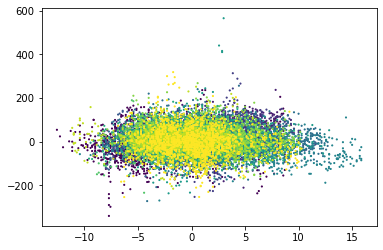

In [56]:
import matplotlib.pyplot as plt
plt.scatter(paris_temp['deviation'], dev_2017_half['quantity'], s=5, c=paris_temp.index.month, marker='.')

In [57]:
[paris_temp.loc['2017-'+str(i),'deviation'].corr(dev_2017_half.loc['2017-'+str(i),'quantity']) for i in range(1,13)]

[0.1731059736110972,
 0.22151308539711462,
 0.2123828859809829,
 -0.11083573080474679,
 -0.002986973009242223,
 -0.3246183066011003,
 0.023340785632900315,
 -0.029591249319082906,
 0.06213430211743197,
 -0.09101782221171775,
 -0.06911584976234496,
 -0.094476184501368]

In [58]:
paris_temp.describe()


,tmpc,mean,deviation
count,17520.000000,17520.000000,17520.000000
mean,12.585788,12.049732,0.536055
std,7.349739,6.139990,3.975214
min,-7.000000,-0.142857,-12.571429
25%,7.000000,6.714286,-2.285714
50%,12.000000,11.714286,0.428571
75%,18.000000,16.857143,3.000000
max,37.000000,27.428571,15.857143


In [59]:
paris_temp.loc[paris_temp['deviation'].idxmax()]

tmpc         36.000000
mean         20.142857
deviation    15.857143
Name: 2017-06-21 14:00:00, dtype: float64

In [60]:
paris_temp.loc[paris_temp['deviation'].idxmin()]

tmpc         -6.000000
mean          6.571429
deviation   -12.571429
Name: 2017-01-07 01:00:00, dtype: float64

<AxesSubplot:>

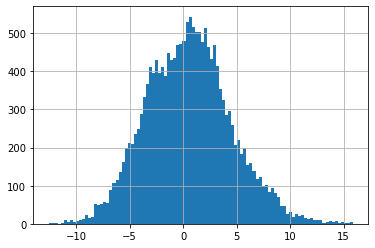

In [61]:
paris_temp['deviation'].hist(bins=100)

<AxesSubplot:>

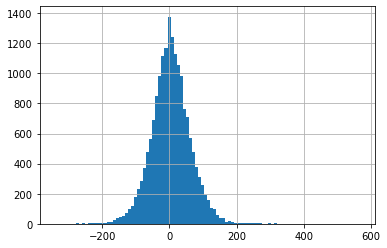

In [62]:
dev_2017_half['quantity'].hist(bins=100)

# Now let's load all the data, historical and 2017, in a single dataframe that we will pivot to get columns of temperature by year and weather station 

We will now load temperature records from 2006 to 2017 as measured by six weather stations, located near six cities. These cities are among the ten most populated cities in France, and are chosen to lie geographically distributed in France (only by eye). The weather station names and the corresponding cities are listed below:
- LFBO: Toulousse
- LFLY: Lyon
- LFML: Marseille
- LFPB: Paris
- LFRS: Nantes
- LFQQ: Lille

*Caution: I just realized that the timestamps of these measurements are given in UTC, whereas the consumption deviation ones are likely given in France local time*


In [63]:
temperature_all_pre = pd.read_csv('asos_six_cities.txt', sep=',', header=0, names=['station', 'timestamp', 'temperature'], parse_dates=['timestamp'], index_col=['timestamp', 'station'])

In [64]:
temperature_all_pre

temperature
timestamp           station             
2006-01-01 00:00:00 LFML             7.0
                    LFRS             3.0
                    LFBO             6.0
                    LFQQ             2.0
2006-01-01 00:30:00 LFBO             6.0
...                                  ...
2017-12-30 23:30:00 LFQQ            11.0
                    LFLY             8.0
                    LFRS            13.0
                    LFPB            14.0
                    LFML             8.0

[1161658 rows x 1 columns]

In [65]:
temperature_all_pre.dtypes

temperature    float64
dtype: object

In [66]:
temperature_all_pre.index.get_level_values(0)

DatetimeIndex(['2006-01-01 00:00:00', '2006-01-01 00:00:00',
               '2006-01-01 00:00:00', '2006-01-01 00:00:00',
               '2006-01-01 00:30:00', '2006-01-01 00:30:00',
               '2006-01-01 00:30:00', '2006-01-01 01:00:00',
               '2006-01-01 01:00:00', '2006-01-01 01:00:00',
               ...
               '2017-12-30 23:00:00', '2017-12-30 23:00:00',
               '2017-12-30 23:00:00', '2017-12-30 23:00:00',
               '2017-12-30 23:30:00', '2017-12-30 23:30:00',
               '2017-12-30 23:30:00', '2017-12-30 23:30:00',
               '2017-12-30 23:30:00', '2017-12-30 23:30:00'],
              dtype='datetime64[ns]', name='timestamp', length=1161658, freq=None)

In [67]:
# apparently there are no missing temperature values. 

temperature_all_pre[temperature_all_pre['temperature']=='null']

,,temperature
timestamp,station,


In [68]:
temperature_all_pre.unstack(level=0)

ValueError: Index contains duplicate entries, cannot reshape

In [69]:
# apparently there are duplicate indices. let's check which ones

temperature_all_pre[temperature_all_pre.index.duplicated(keep=False)].head(50)

temperature
timestamp           station             
2006-03-26 22:00:00 LFPB            17.0
                    LFML            16.0
                    LFML            16.0
                    LFRS            13.0
                    LFQQ            14.0
                    LFQQ            14.0
                    LFBO            13.0
                    LFBO            13.0
                    LFRS            13.0
                    LFPB            17.0
2006-03-26 22:30:00 LFBO            13.0
                    LFBO            13.0
                    LFPB            17.0
                    LFPB            17.0
                    LFML            16.0
                    LFML            16.0
2006-05-30 22:00:00 LFML            14.0
                    LFQQ             6.0
                    LFML            14.0
                    LFQQ             6.0
2006-05-30 22:30:00 LFML            14.0
                    LFML            14.0
2006-05-30 23:30:00 LFML            13.0
                    LFML            13.0
2006-07-30 23:00:00 LFML            26.0
                    LFML            26.0
2006-07-30 23:30:00 LFML            26.0
                    LFML            26.0
2006-12-30 23:30:00 LFBO             7.0
                    LFBO             7.0
2007-03-25 22:00:00 LFML             6.0
                    LFRS             6.0
                    LFRS             6.0
                    LFLY             3.0
                    LFLY             3.0
                    LFPB             5.0
                    LFPB             5.0
                    LFBO             6.0
                    LFBO             6.0
                    LFML             6.0
2007-03-25 22:30:00 LFML             6.0
                    LFML             6.0
                    LFLY             3.0
                    LFBO             5.0
                    LFPB             4.0
                    LFBO             5.0
                    LFPB             4.0
                    LFLY             3.0
2007-05-30 22:30:00 LFPB            14.0
                    LFLY            14.0

In [70]:
temperature_all_unique = temperature_all_pre[~temperature_all_pre.index.duplicated(keep='first')]

In [71]:
temperature_all_unique.head(50)

temperature
timestamp           station             
2006-01-01 00:00:00 LFML             7.0
                    LFRS             3.0
                    LFBO             6.0
                    LFQQ             2.0
2006-01-01 00:30:00 LFBO             6.0
                    LFML             8.0
                    LFRS             3.0
2006-01-01 01:00:00 LFBO             6.0
                    LFML             8.0
                    LFRS             3.0
2006-01-01 01:30:00 LFRS             6.0
                    LFBO             6.0
                    LFML             8.0
2006-01-01 02:00:00 LFBO             6.0
                    LFRS             6.0
                    LFML             8.0
2006-01-01 02:30:00 LFML             8.0
                    LFBO             6.0
                    LFRS             6.0
2006-01-01 03:00:00 LFML             8.0
                    LFQQ             2.0
                    LFRS             6.0
2006-01-01 03:30:00 LFBO             6.0
                    LFML             8.0
2006-01-01 03:54:00 LFBO             6.0
2006-01-01 04:00:00 LFRS             8.0
                    LFML             8.0
                    LFQQ             2.0
2006-01-01 04:30:00 LFQQ             2.0
                    LFBO             6.0
                    LFML             7.0
2006-01-01 05:00:00 LFRS             8.0
                    LFML             6.0
                    LFBO             6.0
                    LFQQ             2.0
                    LFLY             3.0
2006-01-01 05:30:00 LFQQ             2.0
                    LFBO             6.0
                    LFPB             4.0
                    LFML             6.0
2006-01-01 06:00:00 LFRS             9.0
                    LFPB             4.0
                    LFQQ             3.0
                    LFLY             2.0
                    LFML             5.0
                    LFBO             6.0
2006-01-01 06:30:00 LFQQ             3.0
                    LFML             5.0
                    LFPB             4.0
                    LFBO             5.0

In [72]:
# since early records are missing substantial data, let's 
# pass the starting year for the analysis as a variable

starting_year = '2008'

temperature_all_stations = temperature_all_unique.unstack()[starting_year:]

In [73]:
# check the percentage of missing measurements

df=temperature_all_stations
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
print(missing_value_df)

                     percent_missing
            station                 
temperature LFBO            4.703817
            LFLY           13.048374
            LFML            4.896452
            LFPB            4.714305
            LFQQ            8.413000
            LFRS           17.915020


In [74]:
# flatten the column multi-index. now the columns are labelled 
# by the name of the station. as before, the values are the
# (backfilled) temperature of the named station at the given 
# timestamp


temperature_all_stations.columns = temperature_all_stations.columns.get_level_values(1)

In [75]:
# complete the index to encompass all half-hours in the given period
# leaving missing values to be interpolated subsequently

temperature_all_stations_full_range = temperature_all_stations.asfreq('30T')

In [76]:
temperature_all_stations_full_range

station,LFBO,LFLY,LFML,LFPB,LFQQ,LFRS
timestamp,,,,,,
2008-01-01 00:00:00,0.0,0.0,0.0,5.0,5.0,1.0
2008-01-01 00:30:00,0.0,1.0,0.0,5.0,5.0,1.0
2008-01-01 01:00:00,0.0,1.0,0.0,5.0,5.0,0.0
2008-01-01 01:30:00,0.0,2.0,-1.0,5.0,5.0,0.0
2008-01-01 02:00:00,0.0,1.0,-1.0,5.0,5.0,0.0
...,...,...,...,...,...,...
2017-12-30 21:30:00,9.0,10.0,8.0,14.0,12.0,13.0
2017-12-30 22:00:00,8.0,9.0,8.0,14.0,11.0,13.0
2017-12-30 22:30:00,8.0,9.0,6.0,14.0,11.0,13.0


In [77]:
temperature_all_stations_filled = temperature_all_stations_full_range.interpolate()

In [78]:
# for some reason, the last measurement on 2017 is on dec 30th
# let's enlarge the index by the last day of 2017 and reproduce
# the same temperatures as those of the 30th

last_day = pd.date_range(start='2017-12-31', freq='30T', periods=48)
complete_index = temperature_all_stations_filled.index.union(last_day)
temperature_all_stations_complete = temperature_all_stations_filled.reindex(complete_index)
temperature_all_stations_complete['2017-12-31'] = temperature_all_stations_complete['2017-12-30'].values

In [79]:
temperature_all_stations_complete['time_of_year'] = temperature_all_stations_complete.index.strftime('%m-%d %H:%M:%S')

In [80]:
temperature_all_stations_complete['stationwise-mean'],temperature_all_stations_complete['stationwise-std'] = temperature_all_stations_complete.mean(axis=1), temperature_all_stations_complete.std(axis=1)

In [81]:
temperature_all_stations_complete

station,LFBO,LFLY,LFML,LFPB,LFQQ,LFRS,time_of_year,stationwise-mean,stationwise-std
timestamp,,,,,,,,,
2008-01-01 00:00:00,0.0,0.0,0.0,5.0,5.0,1.0,01-01 00:00:00,1.833333,2.483277
2008-01-01 00:30:00,0.0,1.0,0.0,5.0,5.0,1.0,01-01 00:30:00,2.000000,2.366432
2008-01-01 01:00:00,0.0,1.0,0.0,5.0,5.0,0.0,01-01 01:00:00,1.833333,2.483277
2008-01-01 01:30:00,0.0,2.0,-1.0,5.0,5.0,0.0,01-01 01:30:00,1.833333,2.639444
2008-01-01 02:00:00,0.0,1.0,-1.0,5.0,5.0,0.0,01-01 02:00:00,1.666667,2.658320
...,...,...,...,...,...,...,...,...,...
2017-12-31 21:30:00,9.0,10.0,8.0,14.0,12.0,13.0,12-31 21:30:00,11.000000,2.366432
2017-12-31 22:00:00,8.0,9.0,8.0,14.0,11.0,13.0,12-31 22:00:00,10.500000,2.588436
2017-12-31 22:30:00,8.0,9.0,6.0,14.0,11.0,13.0,12-31 22:30:00,10.166667,3.060501


In [82]:
temperature_all_stations_complete.groupby('time_of_year').mean()

station,LFBO,LFLY,LFML,LFPB,LFQQ,LFRS,stationwise-mean,stationwise-std
time_of_year,,,,,,,,
01-01 00:00:00,6.080221,4.536111,7.616691,4.11875,3.81875,3.756471,4.987832,2.612750
01-01 00:30:00,5.742255,4.588889,7.592843,3.92500,3.59375,3.843922,4.881110,2.636853
01-01 01:00:00,5.904289,4.641667,7.568995,3.83125,3.39375,3.531373,4.811887,2.712819
01-01 01:30:00,5.766324,4.694444,7.545147,3.73750,3.39375,3.418824,4.759331,2.771874
01-01 02:00:00,5.428358,4.547222,7.221299,3.64375,3.49375,3.506275,4.640109,2.720245
...,...,...,...,...,...,...,...,...
12-31 21:30:00,7.600000,5.900000,8.650000,4.90000,4.50000,5.400000,6.158333,2.737066
12-31 22:00:00,7.600000,5.800000,8.800000,4.90000,4.40000,5.400000,6.150000,2.782895
12-31 22:30:00,7.394118,5.677778,8.388235,4.90000,4.49375,5.269118,6.020500,2.667320


In [83]:
temp_2017 = temperature_all_stations_complete['2017'][['stationwise-mean']]

In [84]:
temp_2017


station,stationwise-mean
timestamp,
2017-01-01 00:00:00,-0.625000
2017-01-01 00:30:00,-0.500000
2017-01-01 01:00:00,-0.500000
2017-01-01 01:30:00,-0.166667
2017-01-01 02:00:00,-0.333333
...,...
2017-12-31 21:30:00,11.000000
2017-12-31 22:00:00,10.500000
2017-12-31 22:30:00,10.166667


In [85]:
temp_hist = (temperature_all_stations_complete[:'2016'][['stationwise-mean', 'time_of_year']]
             .groupby('time_of_year')
             .mean())

In [86]:
temp_hist_noleap = temp_hist[~temp_hist.index.str.contains('02-29', regex=False)]

In [87]:
temp_hist

station,stationwise-mean
time_of_year,
01-01 00:00:00,5.611480
01-01 00:30:00,5.479011
01-01 01:00:00,5.402097
01-01 01:30:00,5.306665
01-01 02:00:00,5.192714
...,...
12-31 21:30:00,5.620370
12-31 22:00:00,5.666667
12-31 22:30:00,5.559815


In [88]:
temp_hist_noleap['not_a_timestamp'] = pd.to_datetime('2017-'+temp_hist_noleap.index)

<ipython-input-88-12a59cbf862d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_hist_noleap['not_a_timestamp'] = pd.to_datetime('2017-'+temp_hist_noleap.index)


In [89]:
temp_hist_noleap.set_index('not_a_timestamp', inplace=True, drop=True)

In [90]:
temp_hist_noleap

station,stationwise-mean
not_a_timestamp,
2017-01-01 00:00:00,5.611480
2017-01-01 00:30:00,5.479011
2017-01-01 01:00:00,5.402097
2017-01-01 01:30:00,5.306665
2017-01-01 02:00:00,5.192714
...,...
2017-12-31 21:30:00,5.620370
2017-12-31 22:00:00,5.666667
2017-12-31 22:30:00,5.559815


In [91]:
temp_hist_noleap.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:30:00',
               '2017-01-01 01:00:00', '2017-01-01 01:30:00',
               '2017-01-01 02:00:00', '2017-01-01 02:30:00',
               '2017-01-01 03:00:00', '2017-01-01 03:30:00',
               '2017-01-01 04:00:00', '2017-01-01 04:30:00',
               ...
               '2017-12-31 19:00:00', '2017-12-31 19:30:00',
               '2017-12-31 20:00:00', '2017-12-31 20:30:00',
               '2017-12-31 21:00:00', '2017-12-31 21:30:00',
               '2017-12-31 22:00:00', '2017-12-31 22:30:00',
               '2017-12-31 23:00:00', '2017-12-31 23:30:00'],
              dtype='datetime64[ns]', name='not_a_timestamp', length=17520, freq=None)

In [92]:
temp_2017['deviation']=temp_2017['stationwise-mean']-temp_hist_noleap['stationwise-mean']

In [93]:
temp_2017


station,stationwise-mean,deviation
timestamp,,
2017-01-01 00:00:00,-0.625000,-6.236480
2017-01-01 00:30:00,-0.500000,-5.979011
2017-01-01 01:00:00,-0.500000,-5.902097
2017-01-01 01:30:00,-0.166667,-5.473331
2017-01-01 02:00:00,-0.333333,-5.526047
...,...,...
2017-12-31 21:30:00,11.000000,5.379630
2017-12-31 22:00:00,10.500000,4.833333
2017-12-31 22:30:00,10.166667,4.606852


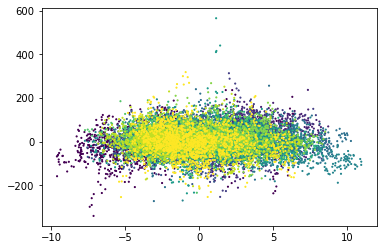

In [94]:
plt.scatter(temp_2017['deviation'], dev_2017_half['quantity'], s=5, c=paris_temp.index.month, marker='.')

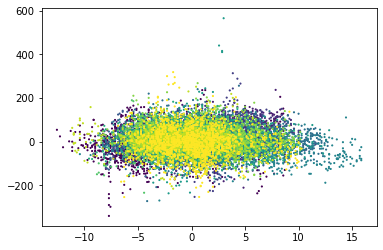

In [95]:
plt.scatter(paris_temp['deviation'], dev_2017_half['quantity'], s=5, c=paris_temp.index.month, marker='.')

In [96]:
[paris_temp.loc['2017-'+str(i),'deviation'].corr(dev_2017_half.loc['2017-'+str(i),'quantity']) for i in range(1,13)]

[0.1731059736110972,
 0.22151308539711462,
 0.2123828859809829,
 -0.11083573080474679,
 -0.002986973009242223,
 -0.3246183066011003,
 0.023340785632900315,
 -0.029591249319082906,
 0.06213430211743197,
 -0.09101782221171775,
 -0.06911584976234496,
 -0.094476184501368]

In [98]:
[temp_2017.loc['2017-'+str(i),'deviation'].corr(dev_2017_half.loc['2017-'+str(i),'quantity']) for i in range(1,13)]

[0.23808932732560653,
 0.2314508266955967,
 0.14749966046633242,
 -0.03721712300619212,
 0.02932600931411517,
 -0.42633996610649033,
 0.019350338499130103,
 -0.007556724185042705,
 -0.06012628003413364,
 -0.023539144385284042,
 -0.1478306212701709,
 -0.1685858976789033]

In [99]:
temp_2017

station,stationwise-mean,deviation
timestamp,,
2017-01-01 00:00:00,-0.625000,-6.236480
2017-01-01 00:30:00,-0.500000,-5.979011
2017-01-01 01:00:00,-0.500000,-5.902097
2017-01-01 01:30:00,-0.166667,-5.473331
2017-01-01 02:00:00,-0.333333,-5.526047
...,...,...
2017-12-31 21:30:00,11.000000,5.379630
2017-12-31 22:00:00,10.500000,4.833333
2017-12-31 22:30:00,10.166667,4.606852


In [124]:
# let's categorize dates according to meteorological season.
# these differ from the astronomical seasons in that they 
# begin with the month and exhibit the hottest (in summer)
# and the coldest (in winter) quarters of the year

def get_season(timestamp):
    
    spring = range(3,6)
    summer = range(6,9)
    autumn = range(9,12)
        
    if timestamp.month in spring: return 'spring'
    elif timestamp.month in summer: return 'summer'
    elif timestamp.month in autumn: return 'autumn'
    else: return 'winter'
    
    

In [125]:
temp_2017['season'] = temp_2017.index.map(get_season)

In [126]:
temp_2017['2017-04']

station,stationwise-mean,deviation,season
timestamp,,,
2017-04-01 00:00:00,11.666667,3.574074,spring
2017-04-01 00:30:00,11.333333,3.407407,spring
2017-04-01 01:00:00,11.333333,3.648148,spring
2017-04-01 01:30:00,11.000000,3.537037,spring
2017-04-01 02:00:00,11.166667,3.898148,spring
...,...,...,...
2017-04-30 21:30:00,9.769231,-2.059922,spring
2017-04-30 22:00:00,9.692308,-1.891315,spring
2017-04-30 22:30:00,9.282051,-2.019004,spring


In [129]:
temp_2017[temp_2017['season']=='summer']

station,stationwise-mean,deviation,season
timestamp,,,
2017-06-01 00:00:00,17.333333,3.055556,summer
2017-06-01 00:30:00,17.000000,3.074074,summer
2017-06-01 01:00:00,16.500000,2.722222,summer
2017-06-01 01:30:00,16.333333,2.722222,summer
2017-06-01 02:00:00,16.500000,3.222222,summer
...,...,...,...
2017-08-31 21:30:00,15.666667,-2.851852,summer
2017-08-31 22:00:00,15.333333,-3.425926,summer
2017-08-31 22:30:00,15.000000,-3.240741,summer


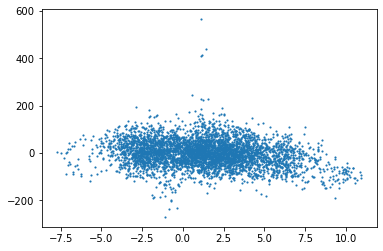

In [135]:
plt.scatter(temp_2017[temp_2017.index.map(get_season)=='summer']['deviation'], dev_2017_half[dev_2017_half.index.map(get_season)=='summer']['quantity'], s=5, marker='.')

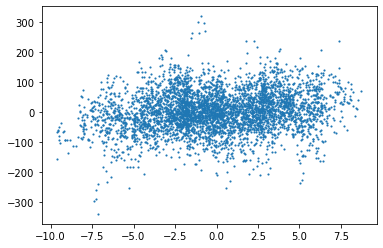

In [136]:
plt.scatter(temp_2017[temp_2017.index.map(get_season)=='winter']['deviation'], dev_2017_half[dev_2017_half.index.map(get_season)=='winter']['quantity'], s=5, marker='.')